<a href="https://colab.research.google.com/github/vbanai/Multi-label-classification_Models_Pytorch-Conv2DandResnet9_Tensorflow_DNNandCNN/blob/main/Pyt_tfseq_(0%2C1)_multilabel_sigm_horse_dolphin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------PYTORCH MODELS---------------

In [ ]:
# -------------   HORSE/DOLPHIN EXECRCISE WITH SIGMOID FUNCTION (MULTILABEL)----------------
#-----------------FIRST APPROACH WITH NORMAL CONV2D ARCHITECTURE (1200 epoch is needed for 95% accuracy and
#                 approx after 1200 epoch I experienced overfitting)----------------

import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from google.colab import files
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
import cv2
from torchvision.datasets import MNIST
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.nn as nn
from PIL import Image
from torchvision.transforms import ToTensor
import numpy as np
from torchvision.datasets import ImageFolder
import pandas as pd

In [ ]:

#stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
#train_tfms = transforms.Compose([transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
 #                        transforms.Resize((128, 128)),
  #                       transforms.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
   #                      transforms.ToTensor(), 
    #                     transforms.Normalize(*stats,inplace=True)])

#ds=ImageFolder("/content/horse", train_tfms)

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#!rm -rf "/content/train"
#!rm -rf "/content/valid"

In [ ]:
path="."
os.chdir(path)
os.makedirs("train")
os.makedirs("valid")
os.makedirs("test")

path="./train"
os.chdir(path)
os.makedirs("horse")
os.makedirs("dolphin")
os.makedirs("dolphin_horse")

path="/content/valid"
os.chdir(path)
os.makedirs("horse")
os.makedirs("dolphin")
os.makedirs("dolphin_horse")

path="/content/test"
os.chdir(path)
os.makedirs("horse")
os.makedirs("dolphin")
os.makedirs("dolphin_horse")

!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/dolphin_train.rar').extractall('/content/train/dolphin/')
Archive('/content/drive/MyDrive/horse_train.rar').extractall('/content/train/horse/')
Archive("/content/drive/MyDrive/dolphin_horse_train.rar").extractall('/content/train/dolphin_horse/')
Archive('/content/drive/MyDrive/horse_valid.rar').extractall('/content/valid/horse/')
Archive('/content/drive/MyDrive/dolphin_valid.rar').extractall('/content/valid/dolphin/')
Archive('/content/drive/MyDrive/dolphin_horse_valid.rar').extractall('/content/valid/dolphin_horse/')
Archive('/content/drive/MyDrive/DolphinTest.rar').extractall('/content/test/dolphin/')
Archive('/content/drive/MyDrive/HorseTest.rar').extractall('/content/test/horse/')
Archive("/content/drive/MyDrive/DolphinHorseTest.rar").extractall('/content/test/dolphin_horse/')


In [ ]:
len(os.listdir("/content/valid/horse/horse_valid"))

41

In [ ]:
#----------TRAINING DATASET CREATION (originaly 465 images in the folders - 209 pcs Horse, 210 pcs Dolphin, 46 pcs Horse&Dolphin)-------------------------------

datadir="/content/train/" 
train_categories=['horse/horse_train/', 'dolphin/dolphin_train/', 'dolphin_horse/dolphin_horse_train/']

dataset_train=[]
def create_train_data():
  for category in train_categories:
    path_train=os.path.join(datadir, category)
    if category=="horse/horse_train/":
      class_num_train=[1,0]
    if category=="dolphin/dolphin_train/":
      class_num_train=[0,1]
    if category=="dolphin_horse/dolphin_horse_train/":
      class_num_train=[1,1]
    for img in os.listdir(path_train):  
      try:
        img_array=cv2.imread(os.path.join(path_train, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_train.append([new_array1, class_num_train])
      except Exception as e:
        print(e)

create_train_data()

import random
random.shuffle(dataset_train)

inputs_train=[]
targets_train=[]

for image, label in dataset_train:
  inputs_train.append(image)
  targets_train.append(label)

#---creating np array from the input images
arr_inputs_train = np.array(inputs_train)
arr_inputs_float_train=arr_inputs_train.astype('float32')


#---convert np array of the input images to tensors-----
arr_tensor_train = [torch.from_numpy(item).float() for item in arr_inputs_float_train]
arr_stack_train=torch.stack(arr_tensor_train)

#--- reshape the input images tensor
arr_stack_train_reshape=arr_stack_train.reshape(-1,3,64,64) 
targets_torch_train=torch.tensor(targets_train, dtype=torch.float32)



In [ ]:
#----------------VALIDATION DATASET CREATION (101 images in the folders, 41 horse, 41 dolphin, 19 dolphin & horse)---------------

datadir="/content/valid/" 
valid_categories=['horse/horse_valid/', 'dolphin/dolphin_valid/', 'dolphin_horse/dolphin_horse_valid/']

dataset_valid=[]
def create_validation_data():
  for category in valid_categories:
    path_valid=os.path.join(datadir, category)
    if category=="horse/horse_valid/":
      class_num_valid=[1,0]
    if category=="dolphin/dolphin_valid/":
      class_num_valid=[0,1]
    if category=="dolphin_horse/dolphin_horse_valid/":
      class_num_valid=[1,1]
    for img in os.listdir(path_valid):  
      try:
        img_array=cv2.imread(os.path.join(path_valid, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_valid.append([new_array1, class_num_valid])
      except Exception as e:
        print(e)

create_validation_data()

import random
random.shuffle(dataset_valid)

inputs_val=[]
targets_val=[]

for image, label in dataset_valid:
  inputs_val.append(image)
  targets_val.append(label)

#---creating np array from the input images
arr_inputs_val = np.array(inputs_val)
arr_inputs_float_val=arr_inputs_val.astype('float32')


#---convert np array of the input images to tensors-----
arr_tensor_val = [torch.from_numpy(item).float() for item in arr_inputs_float_val]
arr_stack_val=torch.stack(arr_tensor_val)

#--- reshape the input images tensor
arr_stack_val_reshape=arr_stack_val.reshape(-1,3,64,64)  #itt vissza 64!!!!!!!!!!!!!!!!!
targets_torch_val=torch.tensor(targets_val, dtype=torch.float32)

In [ ]:
batch_size=32

dataset_tensor_train=TensorDataset(arr_stack_train_reshape, targets_torch_train)
dataset_tensor_valid=TensorDataset(arr_stack_val_reshape, targets_torch_val)

train_dl = DataLoader(dataset_tensor_train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(dataset_tensor_valid, batch_size, shuffle=True, num_workers=2, pin_memory=True)

#------ END OF CUSTOM DATASET CREATION ---------------------

In [ ]:
class ImageClassificationBase(nn.Module):
  
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.binary_cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.binary_cross_entropy(out, labels)    # Calculate loss
        score = F_score(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': score}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def F_score(output, label, threshold=0.5, beta=1):
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum(1).float()
    TN = ((~prob) & (~label)).sum(1).float()
    FP = (prob & (~label)).sum(1).float()
    FN = ((~prob) & label).sum(1).float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)

In [ ]:
class HorseDolphinCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 32 x 32

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 16 x 16

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 8 x 8

            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            
            nn.Flatten(), 
            #nn.Dropout(0.2),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2),
            nn.Sigmoid())
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

In [ ]:
model = to_device(HorseDolphinCnnModel(), device)

In [ ]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            x, y= batch
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history



In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
#test_dl = DeviceDataLoader(test_dl, device)
#to_device(model, device)

In [ ]:
num_epochs = 1200
opt_func = torch.optim.Adam
lr = 0.01

history = fit(num_epochs, lr, model, train_dl, val_dl)

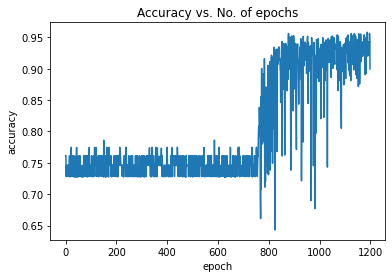

In [ ]:

accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

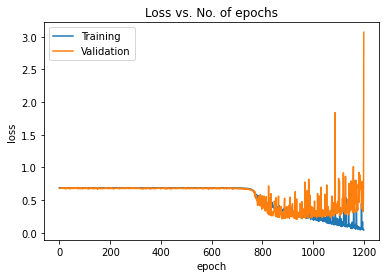

In [ ]:

train_losses = [x.get('train_loss') for x in history]
val_losses = [x['val_loss'] for x in history]
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss vs. No. of epochs');

In [ ]:
torch.save(model.state_dict(), 'pics.modelparameters')

In [ ]:
model2=HorseDolphinCnnModel()
model2.load_state_dict(torch.load('pics.modelparameters'))
model2.state_dict

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    #_, preds  = torch.max(yb, dim=1)
    return yb

In [ ]:
#Prediction for image containing dolphin and horse (it should be around [1,1])
img_array=cv2.imread("/content/drive/MyDrive/tesztdh2.jpg")#, cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array, (64, 64))
new_array1=new_array/255 
test_np = np.array(new_array1)
test_np_float32=test_np.astype('float32')
test_tensor0 = torch.from_numpy(test_np_float32)
test_tensor=test_tensor0.reshape(3,64,64)

In [ ]:
predict_image(test_tensor, model2)

tensor([[0.9998, 0.8887]], grad_fn=<SigmoidBackward>)

In [ ]:
#Prediction for image containing just dolphin (it should be around [0,1])

img_array=cv2.imread("/content/drive/MyDrive/tesztd2.jpg")#, cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array, (64, 64))
new_array1=new_array/255 
test_np = np.array(new_array1)
test_np_float32=test_np.astype('float32')
test_tensor0 = torch.from_numpy(test_np_float32)
test_tensor=test_tensor0.reshape(3,64,64)

In [ ]:
predict_image(test_tensor, model2)

tensor([[1.0000e+00, 3.3359e-05]], grad_fn=<SigmoidBackward>)

In [ ]:
#Prediction for image containing just horse (it should be around [1,0]) 

img_array=cv2.imread("/content/drive/MyDrive/teszth.jpg")#, cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array, (64, 64))
new_array1=new_array/255 
test_np = np.array(new_array1)
test_np_float32=test_np.astype('float32')
test_tensor0 = torch.from_numpy(test_np_float32)
test_tensor=test_tensor0.reshape(3,64,64)

In [ ]:
predict_image(test_tensor, model2)

tensor([[1.0000e+00, 9.2325e-07]], grad_fn=<SigmoidBackward>)

In [ ]:
#-----------------2nd APPROACH USING RESNET 9 (WITHOUT IMAGENET LIBARY AND DATA AUGMENTATION-------------------
#-----------------after only 10 epoch 96% accuracy can be achieved

def F_score(output, label, threshold=0.5, beta=1):
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum(1).float()
    TN = ((~prob) & (~label)).sum(1).float()
    FP = (prob & (~label)).sum(1).float()
    FN = ((~prob) & label).sum(1).float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)
    return F2.mean(0)
    
class ImageClassificationBase(nn.Module):
  
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.binary_cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.binary_cross_entropy(out, labels)    # Calculate loss
        score = F_score(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': score}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        


def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

# Check out ResNeXT from torch vision:
# https://learnopencv.com/multi-label-image-classification-with-pytorch-image-tagging/
# NUS-WIDE dataset


class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64, pool=True)  #32 x32
        self.conv2 = conv_block(64, 128, pool=True)          #16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True) # 8 x 8
        self.conv4 = conv_block(256, 512, pool=True) # 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(
                                        nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        #nn.Dropout(0.2),
                                        nn.Linear(512, num_classes),
                                        nn.Sigmoid())
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out





In [ ]:
#-----if gpu is available

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()

model = to_device(ResNet9(3,2), device)
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)



In [ ]:
#if GPU is not available

model = ResNet9(3, 2)

In [ ]:
history = []
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    #history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                               steps_per_epoch=len(train_loader))
    #sched = torch.optim.lr_scheduler.StepLR(opt_func, step_size=100, gamma=0.1)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    #return history

epochs = 30
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam


fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

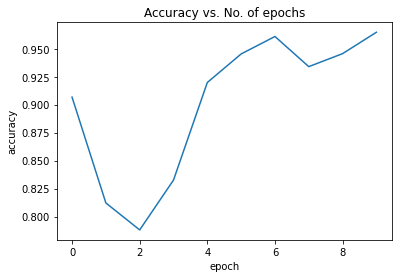

In [ ]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

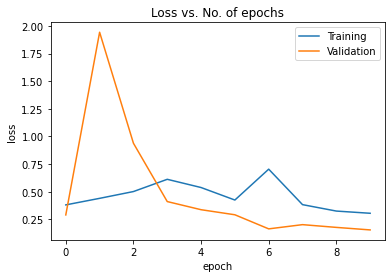

In [ ]:
train_losses = [x.get('train_loss') for x in history]
val_losses = [x['val_loss'] for x in history]
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss vs. No. of epochs');

In [ ]:
torch.save(model.state_dict(), 'pics.modelparameters')

In [ ]:
model2=ResNet9(3,2)
model2.load_state_dict(torch.load('pics.modelparameters'))
model2.state_dict


In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    #_, preds  = torch.max(yb, dim=1)
    return yb

In [ ]:
#Prediction for image containing dolphin and horse (it should be around [1,1])
img_array=cv2.imread("/content/drive/MyDrive/tesztdh.jpg")#, cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array, (64, 64))
new_array1=new_array/255 
test_np = np.array(new_array1)
test_np_float32=test_np.astype('float32')
test_tensor0 = torch.from_numpy(test_np_float32)
test_tensor=test_tensor0.reshape(3,64,64)

In [ ]:
predict_image(test_tensor, model2)

tensor([[0.7159, 0.9445]], grad_fn=<SigmoidBackward>)

In [ ]:
#Prediction for image containing just dolphin (it should be around [0,1])

img_array=cv2.imread("/content/drive/MyDrive/tesztd3.jpg")#, cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array, (64, 64))
new_array1=new_array/255 
test_np = np.array(new_array1)
test_np_float32=test_np.astype('float32')
test_tensor0 = torch.from_numpy(test_np_float32)
test_tensor=test_tensor0.reshape(3,64,64)

predict_image(test_tensor, model2)

tensor([[0.9193, 0.7841]], grad_fn=<SigmoidBackward>)

In [ ]:
#Prediction for image containing just horse (it should be around [1,0]) 

img_array=cv2.imread("/content/drive/MyDrive/teszth2.jpg")#, cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array, (64, 64))
new_array1=new_array/255 
test_np = np.array(new_array1)
test_np_float32=test_np.astype('float32')
test_tensor0 = torch.from_numpy(test_np_float32)
test_tensor=test_tensor0.reshape(3,64,64)

predict_image(test_tensor, model2)

tensor([[0.5752, 0.9422]], grad_fn=<SigmoidBackward>)

In [ ]:
import tensorflow as tf
a=tf.Variable([5,6,7],[1,3,4])
print(a.rank)

-------TENSORFLOW (SEQUENTIAL) DNN MODEL---------

In [ ]:

# run the first three division on the top to create the necesary folders

import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers



datadir="/content/train/" 
train_categories=['horse/horse_train/', 'dolphin/dolphin_train/', 'dolphin_horse/dolphin_horse_train/']

dataset_train=[]
def create_train_data():
  for category in train_categories:
    path_train=os.path.join(datadir, category)
    if category=="horse/horse_train/":
      class_num_train=[1,0]
    if category=="dolphin/dolphin_train/":
      class_num_train=[0,1]
    if category=="dolphin_horse/dolphin_horse_train/":
      class_num_train=[1,1]
    for img in os.listdir(path_train):  
      try:
        img_array=cv2.imread(os.path.join(path_train, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_train.append([new_array1, class_num_train])
      except Exception as e:
        print(e)

create_train_data()

import random
random.shuffle(dataset_train)

inputs_train=[]
targets_train=[]

for image, label in dataset_train:
  inputs_train.append(image)
  targets_train.append(label)

#---creating np array from the input images
arr_inputs_train = np.array(inputs_train)
arr_inputs_float_train=arr_inputs_train.astype('float32')


arr_inputs_train_targets = np.array(targets_train)
arr_inputs_float_train_targets=arr_inputs_train_targets.astype('float32')




datadir="/content/valid/" 
valid_categories=['horse/horse_valid/', 'dolphin/dolphin_valid/', 'dolphin_horse/dolphin_horse_valid/']

dataset_valid=[]
def create_validation_data():
  for category in valid_categories:
    path_valid=os.path.join(datadir, category)
    if category=="horse/horse_valid/":
      class_num_valid=[1,0]
    if category=="dolphin/dolphin_valid/":
      class_num_valid=[0,1]
    if category=="dolphin_horse/dolphin_horse_valid/":
      class_num_valid=[1,1]
    for img in os.listdir(path_valid):  
      try:
        img_array=cv2.imread(os.path.join(path_valid, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_valid.append([new_array1, class_num_valid])
      except Exception as e:
        print(e)

create_validation_data()

import random
random.shuffle(dataset_valid)

inputs_val=[]
targets_val=[]

for image, label in dataset_valid:
  inputs_val.append(image)
  targets_val.append(label)

#---creating np array from the input images
arr_inputs_val = np.array(inputs_val)
arr_inputs_float_val=arr_inputs_val.astype('float32')



#------TEST DATASET-----------


datadir="/content/test/" 
test_categories=['horse/HorseTest/', 'dolphin/DolphinTest/', 'dolphin_horse/DolphinHorseTest/']

dataset_test=[]
def create_test_data():
  for category in test_categories:
    path_test=os.path.join(datadir, category)
    if category=="horse/HorseTest/":
      class_num_test=[1,0]
    if category=="dolphin/DolphinTest/":
      class_num_test=[0,1]
    if category=="dolphin_horse/DolphinHorseTest/":
      class_num_test=[1,1]
    for img in os.listdir(path_test):  
      try:
        img_array=cv2.imread(os.path.join(path_test, img))#, cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (64, 64))  
        new_array1=new_array/255 
        dataset_test.append([new_array1, class_num_test])
      except Exception as e:
        print(e)

create_test_data()

import random
random.shuffle(dataset_test)

inputs_test=[]
targets_test=[]

for image, label in dataset_test:
  inputs_test.append(image)
  targets_test.append(label)

#---creating np array from the input images
arr_inputs_test = np.array(inputs_test)
arr_inputs_float_test=arr_inputs_test.astype('float32')



#---------------- NOW YOU CAN RUN THE DNN OR THE CNN MODELS----------


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
print(len(inputs_test))

In [ ]:



# 1.) MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid') 
    #keras.layers.Sigmoid()

    ])

# 2.) lOSS, OPTIMIZER, METRICS
loss = keras.losses.BinaryCrossentropy(from_logits=False)  #SparseCategoricalCrossentropy as we have single classes(1,2), 
                                                                    #if it is vector (0,1,0,0....) CategoricalCrossentropy. 
                                                                    #From_logits=True as we didn't build the softmax into the model
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

# 3.) CONFIGURATION OF THE MODEL

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# 4.) TRAINING
batch_size = 32
epochs = 50

history=model.fit(arr_inputs_float_train, arr_inputs_float_train_targets, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
15/15 - 3s - loss: 1.7529 - accuracy: 0.6277
Epoch 2/50
15/15 - 0s - loss: 0.3722 - accuracy: 0.8442
Epoch 3/50
15/15 - 0s - loss: 0.3414 - accuracy: 0.8290
Epoch 4/50
15/15 - 0s - loss: 0.4259 - accuracy: 0.8052
Epoch 5/50
15/15 - 0s - loss: 0.3021 - accuracy: 0.8788
Epoch 6/50
15/15 - 0s - loss: 0.2515 - accuracy: 0.8701
Epoch 7/50
15/15 - 0s - loss: 0.2461 - accuracy: 0.8680
Epoch 8/50
15/15 - 0s - loss: 0.2310 - accuracy: 0.8874
Epoch 9/50
15/15 - 0s - loss: 0.2184 - accuracy: 0.8853
Epoch 10/50
15/15 - 0s - loss: 0.2393 - accuracy: 0.8853
Epoch 11/50
15/15 - 0s - loss: 0.2239 - accuracy: 0.8831
Epoch 12/50
15/15 - 0s - loss: 0.1832 - accuracy: 0.9048
Epoch 13/50
15/15 - 0s - loss: 0.1542 - accuracy: 0.9264
Epoch 14/50
15/15 - 0s - loss: 0.1430 - accuracy: 0.9264
Epoch 15/50
15/15 - 0s - loss: 0.1402 - accuracy: 0.9264
Epoch 16/50
15/15 - 0s - loss: 0.1290 - accuracy: 0.9394
Epoch 17/50
15/15 - 0s - loss: 0.1623 - accuracy: 0.9069
Epoch 18/50
15/15 - 0s - loss: 0.1389 - 

In [ ]:
from matplotlib import pyplot as plt

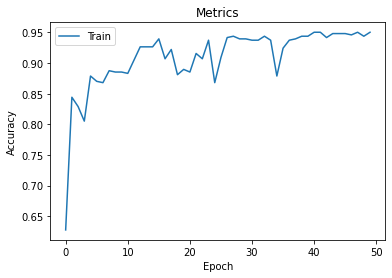

In [ ]:
plt.plot(history.history["accuracy"])
plt.title("Metrics")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train"], loc="upper left")



In [ ]:
predictions = model(arr_inputs_float_test)

In [ ]:
counter=0
for i in range(len(targets_test)):
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:  #[1,1]
    counter+=1
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:   #[1,0]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:    #[0,1]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:    #[0,0]
    counter+=1


print(counter/len(targets_test))



0.8243243243243243


------- TF_CNN model----------------

In [ ]:

modelCNN = keras.models.Sequential()
modelCNN.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(64,64,3)))  #64
modelCNN.add(layers.MaxPool2D((2,2)))   #32
modelCNN.add(layers.Conv2D(64, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #16
modelCNN.add(layers.Conv2D(128, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #8
modelCNN.add(layers.Conv2D(256, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #4
modelCNN.add(layers.MaxPool2D((2,2)))  #2
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dropout(0.2)) 
modelCNN.add(layers.Dense(1024, activation='relu'))
modelCNN.add(layers.Dense(512, activation='relu'))
modelCNN.add(layers.Dense(2, activation='sigmoid'))


# 2.) lOSS, OPTIMIZER, METRICS
loss = keras.losses.BinaryCrossentropy(from_logits=False)  #SparseCategoricalCrossentropy as we have single classes(1,2), 
                                                                    #if it is vector (0,1,0,0....) CategoricalCrossentropy. 
                                                                    #From_logits=True as we didn't build the softmax into the model
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

# 3.) CONFIGURATION OF THE MODEL

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# 4.) TRAINING
batch_size = 32
epochs = 30

model.fit(arr_inputs_float_train, arr_inputs_float_train_targets, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
15/15 - 0s - loss: 0.7637 - accuracy: 0.8052
Epoch 2/30
15/15 - 0s - loss: 0.1400 - accuracy: 0.8939
Epoch 3/30
15/15 - 0s - loss: 0.0710 - accuracy: 0.9307
Epoch 4/30
15/15 - 0s - loss: 0.0489 - accuracy: 0.9502
Epoch 5/30
15/15 - 0s - loss: 0.0399 - accuracy: 0.9437
Epoch 6/30
15/15 - 0s - loss: 0.0313 - accuracy: 0.9437
Epoch 7/30
15/15 - 0s - loss: 0.0349 - accuracy: 0.9459
Epoch 8/30
15/15 - 0s - loss: 0.0349 - accuracy: 0.9416
Epoch 9/30
15/15 - 0s - loss: 0.0460 - accuracy: 0.9610
Epoch 10/30
15/15 - 0s - loss: 0.0557 - accuracy: 0.9264
Epoch 11/30
15/15 - 0s - loss: 0.0436 - accuracy: 0.9437
Epoch 12/30
15/15 - 0s - loss: 0.0272 - accuracy: 0.9524
Epoch 13/30
15/15 - 0s - loss: 0.0275 - accuracy: 0.9437
Epoch 14/30
15/15 - 0s - loss: 0.0246 - accuracy: 0.9545
Epoch 15/30
15/15 - 0s - loss: 0.0249 - accuracy: 0.9524
Epoch 16/30
15/15 - 0s - loss: 0.0245 - accuracy: 0.9502
Epoch 17/30
15/15 - 0s - loss: 0.0163 - accuracy: 0.9481
Epoch 18/30
15/15 - 0s - loss: 0.0169 - 

In [ ]:
predictions = modelCNN(arr_inputs_float_val)


In [ ]:
counter=0
for i in range(len(targets_val)):
  if targets_val[i][0]==1 and 0.5< predictions[i][0] and targets_val[i][1]==1 and 0.5< predictions[i][1]:  #[1,1]
    counter+=1
  if targets_val[i][0]==1 and 0.5< predictions[i][0] and targets_val[i][1]==0 and 0.5> predictions[i][1]:   #[1,0]
    counter+=1
  if targets_val[i][0]==0 and 0.5> predictions[i][0] and targets_val[i][1]==1 and 0.5< predictions[i][1]:    #[0,1]
    counter+=1
  if targets_val[i][0]==0 and 0.5> predictions[i][0] and targets_val[i][1]==0 and 0.5> predictions[i][1]:    #[0,0]
    counter+=1


print(counter/len(targets_val))

In [ ]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

In [ ]:
modelCNN.save("nn_Horse_Dolphin.h5")  

new_model = keras.models.load_model("nn_Horse_Dolphin.h5")

In [ ]:
predictions = new_model(arr_inputs_float_val)

counter=0
for i in range(len(targets_val)):
  if targets_val[i][0]==1 and 0.5< predictions[i][0] and targets_val[i][1]==1 and 0.5< predictions[i][1]:  #[1,1]
    counter+=1
  if targets_val[i][0]==1 and 0.5< predictions[i][0] and targets_val[i][1]==0 and 0.5> predictions[i][1]:   #[1,0]
    counter+=1
  if targets_val[i][0]==0 and 0.5> predictions[i][0] and targets_val[i][1]==1 and 0.5< predictions[i][1]:    #[0,1]
    counter+=1
  if targets_val[i][0]==0 and 0.5> predictions[i][0] and targets_val[i][1]==0 and 0.5> predictions[i][1]:    #[0,0]
    counter+=1


print(counter/len(targets_val))

In [ ]:
#Check the model on the test dataset

predictions=new_model(arr_inputs_float_test)

counter=0
for i in range(len(targets_test)):
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:  #[1,1]
    counter+=1
  if targets_test[i][0]==1 and 0.5< predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:   #[1,0]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==1 and 0.5< predictions[i][1]:    #[0,1]
    counter+=1
  if targets_test[i][0]==0 and 0.5> predictions[i][0] and targets_test[i][1]==0 and 0.5> predictions[i][1]:    #[0,0]
    counter+=1


print(counter/len(targets_test))



In [ ]:
a=predictions.numpy()
torch_predictions=torch.tensor(a, dtype=torch.float32)


In [ ]:
arr_inputs_test = np.array(targets_test)
arr_inputs_float_targetstest=arr_inputs_test.astype('float32')

def F_score(output, label, threshold=0.5, beta=1):
    prob = output > threshold
    label = label > threshold

    TP = (prob & label).sum(1).float()
    TN = ((~prob) & (~label)).sum(1).float()
    FP = (prob & (~label)).sum(1).float()
    FN = ((~prob) & label).sum(1).float()

    precision = torch.mean(TP / (TP + FP + 1e-12))
    recall = torch.mean(TP / (TP + FN + 1e-12))
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)

    # F2 = 2* precision * recall / (precision + recall)

    return F2.mean(0)






score = F_score(torch_predictions, arr_inputs_float_targetstest)
print(score)


In [ ]:
len(arr_inputs_float_test)
#len(arr_inputs_float_targetstest)

End of the project

Some miscellaneous and pilot codes,
This part doesn't belong to the above-mentioned
pytorch vs tensorflow project

In [ ]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

names = ["dolphin", "dolphin_horse", "horse"]

preprocess_input = tf.keras.applications.vgg16.preprocess_input

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    r'/content/train',
    target_size=(64, 64),
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    r'/content/valid',
    target_size=(64, 64),
    class_mode='sparse',
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    r'/content/test',
    target_size=(64, 64),
    class_mode='sparse',
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    classes=names)

In [ ]:
len(train_batches)

In [ ]:
train_batch = train_batches[2]
print(train_batch[0][0].shape)

test_batch = test_batches[3]
print(test_batch[0].shape)
print(test_batch[1])

def show(batch, pred_labels=None):
    #plt.figure(figsize=(1,1))
    fig, (ax)=plt.subplots(2,2, sharex=True)
    ax = ax.flatten()
    #ax = ax.T.flatten()
    for i in range(4):    
        ax[i].imshow(batch[0][i])
        ax[i].set_title(names[int(batch[1][i])])
 
show(test_batch)

In [ ]:
modelCNN = keras.models.Sequential()
modelCNN.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(64,64,3)))  
modelCNN.add(layers.MaxPool2D((2,2)))   #117
modelCNN.add(layers.Conv2D(64, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #16
modelCNN.add(layers.Conv2D(128, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #8
modelCNN.add(layers.Conv2D(256, 3, activation='relu'))
modelCNN.add(layers.MaxPool2D((2,2)))  #4
modelCNN.add(layers.MaxPool2D((2,2)))  #2
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(1024, activation='relu'))
modelCNN.add(layers.Dense(512, activation='relu'))
modelCNN.add(layers.Dense(3, activation='sigmoid'))


# 2.) lOSS, OPTIMIZER, METRICS

loss = keras.losses.BinaryCrossentropy(from_logits=False)  #SparseCategoricalCrossentropy as we have single classes(1,2), 
                                                                    #if it is vector (0,1,0,0....) CategoricalCrossentropy. 
                                                                    #From_logits=True as we didn't build the softmax into the model
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

# 3.) CONFIGURATION OF THE MODEL

modelCNN.compile(loss=loss, optimizer=optim, metrics=metrics)
#model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

# 4.) TRAINING

epochs = 30

modelCNN.fit(train_batches, validation_data=val_batches,
          epochs=epochs, verbose=2)


In [ ]:
####THE HOUSING EXERCISE TF

import numpy as np
import tensorflow
from tensorflow import keras

def house_model(y_new):
    xs = np.array([[1.], [2], [3], [4], [5], [6]], dtype='float32')
    ys = np.array([[0.1], [0.15], [0.2], [0.25], [0.3], [0.35]], dtype='float32')
    model =keras.Sequential([keras.layers.Dense(1)])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    model.fit(xs, ys, epochs=500)
    return model.predict(y_new)

prediction = house_model([7.0])
print(prediction*10)

In [ ]:
#SEE THE CONVOLUTION

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')